In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
home = os.path.expanduser("~")
folder_code = f'{home}/Documents/code/phd'
sys.path.insert(0, f'{folder_code}/util')
import myFuncs as mF # imports common operators / functions
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [17]:
da = xr.open_dataset('/Users/cbla0002/Documents/data/hur/sample_data/cmip6/TaiESM1_hur_monthly_historical_regridded.nc')['hur']
da

<xarray.DataArray 'hur' (time: 360, plev: 19, lat: 22, lon: 128)>
[19261440 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

In [18]:
da.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0

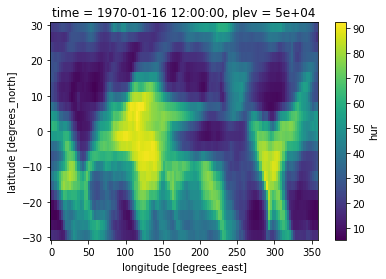

In [21]:
da_day = da.isel(time=0).sel(plev = 500e2).plot()

In [32]:
def calc_vertical_mean(da):
    da = da.sel(plev=slice(850e2, 0)) # free troposphere (most values at 1000 hPa over land are NaN)
    return (da * da['plev']).sum(dim='plev') / da['plev'].sum(dim='plev')

In [31]:
section = da.sel(plev = slice(850e2,0))
section.plev

<xarray.DataArray 'plev' (plev: 17)>
array([85000., 70000., 60000., 50000., 40000., 30000., 25000., 20000., 15000.,
       10000.,  7000.,  5000.,  3000.,  2000.,  1000.,   500.,   100.])
Coordinates:
  * plev     (plev) float64 8.5e+04 7e+04 6e+04 5e+04 ... 1e+03 500.0 100.0

In [33]:
vMean = calc_vertical_mean(da)
vMean

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[30.98469061, 29.59809004, 26.83859202, ..., 32.1820327 ,
         32.28124605, 31.81134719],
        [26.84536853, 25.10952346, 22.49838113, ..., 29.1253902 ,
         28.56318225, 27.95771909],
        [25.55419608, 23.44091014, 21.24887094, ..., 29.31525166,
         28.25901943, 27.07095749],
        ...,
        [25.04363989, 23.84482147, 23.46109698, ..., 28.53762957,
         27.0854858 , 25.91410968],
        [25.43467638, 24.78740308, 25.01105955, ..., 30.36031499,
         28.55583525, 26.70036625],
        [30.85894962, 30.46883659, 30.96099119, ..., 35.09475029,
         33.52532174, 32.46817549]],

       [[29.53627048, 26.47334937, 24.40728394, ..., 40.75997855,
         37.9651194 , 33.32338159],
        [25.96699952, 24.26485065, 22.88087959, ..., 33.91291448,
         31.10932811, 28.16093273],
        [25.39572949, 25.60688345, 26.57512897, ..., 28.69278882,
         27.37160194, 26.09214462],
...
        [26.16131767, 27.05480774, 28.40671724, ..., 22.72570583,
         23.39374193, 24.85167579],
        [25.57308202, 26.31382515, 28.20317646, ..., 25.07536141,
         25.23624008, 25.43664788],
        [30.74592756, 30.73896167, 30.92398767, ..., 30.81111952,
         31.97016891, 32.21114026]],

       [[33.85540876, 31.99174491, 29.75545901, ..., 37.73728401,
         36.8394776 , 35.51104488],
        [26.06292706, 24.6347609 , 23.6412248 , ..., 29.90407992,
         29.03730786, 27.73982381],
        [23.23730768, 23.76533877, 24.3163841 , ..., 25.4731606 ,
         24.37825673, 23.61319704],
        ...,
        [21.48523288, 21.42003378, 22.61475655, ..., 22.84194252,
         21.85828309, 21.22687543],
        [22.57324285, 22.3467751 , 24.11599858, ..., 24.21696989,
         24.47595245, 23.75312027],
        [27.29396568, 27.54230177, 27.67999503, ..., 27.12269657,
         28.00429428, 28.03388341]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

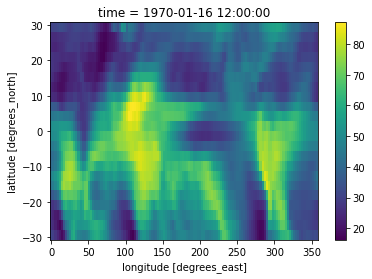

In [35]:
vMean.isel(time=0).plot()